### Plotting Forbes Global 2000 Per Country for the year 2021 in World Map

In [1]:
!pip install openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("D:/Forbes-2021.xlsx")

In [3]:
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,2021
1,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,2021
2,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,2021
3,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,2021
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",2021


### Here we are making a Count Column to count the number of times each Country appeared

In [4]:
df['Count_Column'] = df['Country'].map(df['Country'].value_counts())


In [5]:
df.head()


,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year,Count_Column
0,1.0,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,2021,307
1,2.0,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,2021,611
2,3.0,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,2021,611
3,4.0,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,2021,307
4,5.0,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",2021,13


### Using Pyecharts to plot the data

In [6]:
#import libraries
!pip install pyecharts
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType

### Taking the two columns which will be important for us

In [7]:
d = df[['Country','Count_Column']]


In [8]:
#dropping the duplicates
d = d.drop_duplicates(subset = 'Country', keep = 'first')

### Changing South Korea to Korea to match our map

In [9]:
d['Country'][10] = 'Korea'


In [10]:
country=list(d['Country'])
count=list(d['Count_Column'])

In [11]:
list1 = [[country[i],count[i]] for i in range(len(country))] 
map_1 = Map(init_opts=opts.InitOpts(width='1000px', height='460px',theme=ThemeType.ROMANTIC)) 
map_1.add('Total Confirmed Cases', 
 list1, 
 maptype='world',
 is_map_symbol_show=False) 
map_1.set_series_opts(label_opts=opts.LabelOpts(is_show=False)) 
map_1.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=611,is_piecewise=True,pieces=[
 {"max": 1},
 {"max": 0, "max":4},
 {"max": 1, "max": 4},
 {"max": 5, "max": 9},
 {"max": 10, "max": 19},
 {"max": 20, "max": 49},
 {"max": 50, "max": 99},
 {"max": 200, "max": 500},
 {"max": 500, "max":612},]),
  title_opts=opts.TitleOpts(
 title='Forbes Global 2000 Companies Per Country (2021)',
 pos_left='center',
 padding=0,
 item_gap=2,
 title_textstyle_opts= opts.TextStyleOpts(color='Black',
 font_weight='bold',
 font_family='Courier New',
 font_size=30), 
 subtitle_textstyle_opts= opts.TextStyleOpts(color='grey',
 font_weight='bold',
 font_family='Courier New',
 font_size=13)), 
 legend_opts=opts.LegendOpts(is_show=False))
map_1.render_notebook()

### Top 15 Countries with their companies featured in Forbes Global 2000

<AxesSubplot:xlabel='Country', ylabel='count'>

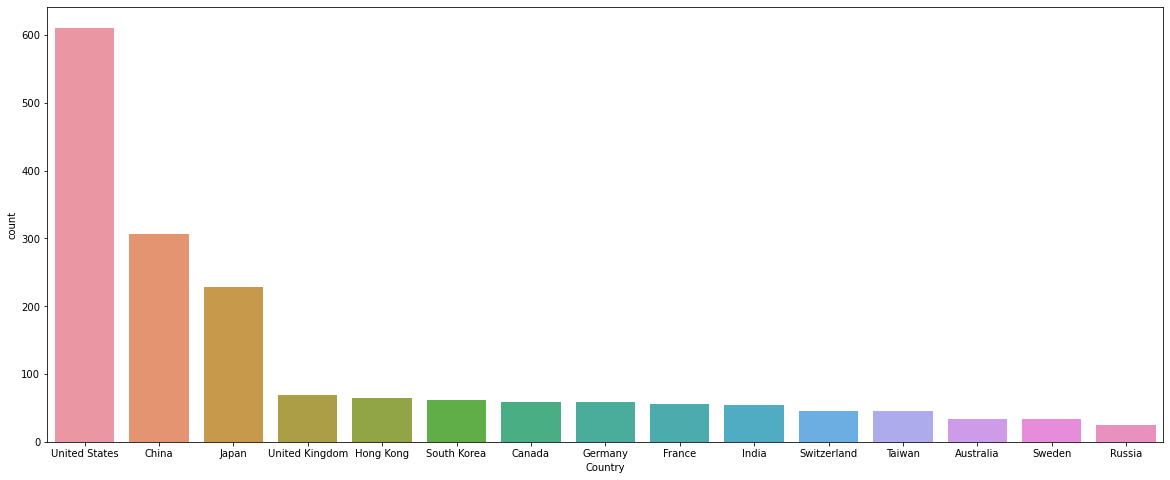

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x="Country", data=df,order=df.Country.value_counts().iloc[:15].index)